## İş Uygulaması: Şirket için Eğitimin Performans Etkisi Ölçüsü  
Belirli uğraşlar sonucunda alınan bir eğitimin katma değer sağlayığ sağlayamadığı ölçülmek isteniyor.    

### Detaylar  
* Bir departman bir konuda eğitim alıyor  
* Gerekli/Gereksiz değerlendirmeleri neticesinde eğitim alınıyor.    
* Eğitimden önce ve sonra olacak şekilde gerekli ölçümler yapılıyor.    
* Eğitim sonrasında eğitimin sağladığı katkı test edilmek isteniyor.  

H0: Eğitim öncesi ve sonrasında fark yoktur.    
H1: Eğitim öncesi ve sonrasında fark vardır.  

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:

oncesi = pd.DataFrame([123, 119, 119, 116, 123, 123, 121, 120, 117, 118, 121,121,123,119,121, 118, 124, 121, 125, 115, 115, 119, 118, 121, 117, 117, 120,120,
121, 117, 118, 117, 123, 118, 124, 121, 115, 118, 125, 115])

sonrasi = pd.DataFrame([118, 127, 122, 132, 129, 123, 129, 132, 128, 130, 128, 138, 140, 130, 134, 134, 124, 140, 134, 129, 129, 138, 134, 124, 122, 126, 133, 127,
130, 130, 130, 132, 117, 130, 125, 129, 133, 120, 127, 123])

In [17]:
# Birinci Veri Setini Düzenle

#oncesi ve sonrası, AYRIK olarak yeni bir listede birlestirildi

AYRIK =pd.concat([oncesi, sonrasi], axis=1)
AYRIK.columns = (["ONCESI", "SONRASI"])
print(" 'AYRIK' Veri Seti: \n\n", AYRIK.head(),"\n\n")

GRUP_ONCESI = np.arange(len(oncesi))  #array olustur
GRUP_ONCESI = pd.DataFrame(GRUP_ONCESI) #olusturulan arrayi dataframe haline getir
GRUP_ONCESI[:] = "ONCESI"  #dataframe'e adını ver

#Flag ve oncesi degerlerini bir araya getirme işlemi
A = pd.concat([oncesi, GRUP_ONCESI], axis=1)

#Sonrası Flag/Tag'ını Olusturma
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI = pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:] = "SONRASI"

#Flag ve sonrası degerlerini bir araya getirme
B = pd.concat([sonrasi, GRUP_SONRASI], axis=1)

#Tüm Veriyi Birlestirme
BIRLIKTE = pd.concat([A,B])
BIRLIKTE

#İsimlendirme
BIRLIKTE.columns = ["PERFORMANS", "ONCESI_SONRASI"]
print(" 'BIRLIKTE' Veri Seti: \n\n", BIRLIKTE.head(), "\n")


 'AYRIK' Veri Seti: 

    ONCESI  SONRASI
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 


 'BIRLIKTE' Veri Seti: 

    PERFORMANS ONCESI_SONRASI
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI 



In [24]:
# import pandas as pd

# # Veri Setlerini Birleştirme
# AYRIK = pd.concat([oncesi, sonrasi], axis=1)
# AYRIK.columns = ["ONCESI", "SONRASI"]

# # Veri Setlerine Etiket Ekleme ve Birleştirme
# BIRLIKTE = pd.concat([oncesi.assign(PERFORMANS=oncesi, ONCESI_SONRASI="ONCESI"), 
#                       sonrasi.assign(PERFORMANS=sonrasi, ONCESI_SONRASI="SONRASI")])

# print(" 'AYRIK' Veri Seti: \n\n", AYRIK.head(), "\n\n")
# print(" 'BIRLIKTE' Veri Seti: \n\n", BIRLIKTE, "\n")


<Axes: xlabel='ONCESI_SONRASI', ylabel='PERFORMANS'>

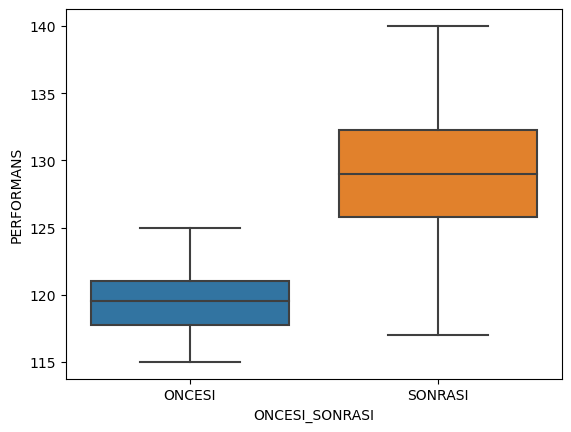

In [18]:
sns.boxplot(x="ONCESI_SONRASI", y="PERFORMANS", data=BIRLIKTE)

In [27]:
# Varsayım Kontrolleri (Bagimli iki örneklem)

from scipy.stats import shapiro #normallik varsayımı

shapiro(AYRIK.ONCESI)




ShapiroResult(statistic=0.9543651342391968, pvalue=0.10722016543149948)

In [28]:
shapiro(AYRIK.SONRASI)

ShapiroResult(statistic=0.9780092239379883, pvalue=0.6159630417823792)

PValue > 0.05 olduğu için H0 hipotezi reddedilemedi.  
Veri setinin dağılımının normal olduğu test ettik.

In [30]:
import scipy.stats as stats

stats.levene(AYRIK.ONCESI, AYRIK.SONRASI)

# pvalue < 0.05 olduğu için varyansların homojenliği varsayımı sağlanamadı 


LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

Varyansların homojenliği sağlanamadığında yapılacak bazı durumlar vardır.  

* Veri setinde aykırılıklar varsa bu aykırılıklar tekrar incelenebilir.  
* Bağımlı iki örneklem testinde varyans homojenliği incelendiğinde H0 reddedildiyse ise bu durum bir miktar göz ardı edilebilir.  

Bu örnek bağlamında varyans homojenliği göz ardı edilerek işlemlere devam edilmiştir.

# Hipotez Testi

In [31]:
stats.ttest_rel(AYRIK.ONCESI, AYRIK.SONRASI)  

TtestResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11, df=39)

In [33]:
Test_Istatistigi, pValue = stats.ttest_rel(AYRIK["ONCESI"], AYRIK["SONRASI"])

print('Test İstatistiği = %4.f, pvalue = %4.f'  %  (Test_Istatistigi, pValue))

Test İstatistiği =   -9, pvalue =    0


pValue < 0.05 olduğu için H0 hipotezi reddedilmiştir.  

Sonuç:  

%95 güven aralığında Alınan eğitimler sonucunda istatistiki olarak anlamlı bir farklılık vardır.  
  

## Noneparametric Bağımlı iki Örneklem Testi

Test sürecinde gerçekleşmesi gereken şekilde devam edilirse  
Varsayım testi reddedildiği için noneparametric bagımlı iki örneklem testi kullanılmalıydı  
noneparametric test kullanıldığında sonucun doğru olduğunu tekrar görmekteyiz.  

In [37]:
stats.wilcoxon(AYRIK.ONCESI, AYRIK.SONRASI)

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

In [39]:
Test_Istatistigi, pValue = stats.wilcoxon(AYRIK["ONCESI"], AYRIK["SONRASI"])

print('Test İstatistiği = %4.f, pvalue = %4.f'  %  (Test_Istatistigi, pValue))

Test İstatistiği =   15, pvalue =    0


pValue < 0.05 olduğu için H0 hipotezi reddedildi.  
Noneparametric test sonucunda iki grup arasında istatistiki olarak anlamlı bir farklılık gözlemlenmektedir.